In [4]:
# ========================== A1 ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Step 1: Read the dataset (limit to 500 rows) and drop any rows with missing values
data_frame = pd.read_csv("/content/MHDS (2).csv", nrows=500).dropna()

# Step 2: Columns containing non-numeric data that require encoding
category_cols = [
    'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage', 'Diet_Quality', 'Stress_Level'
]

# Encode each categorical feature into numerical labels
for feature in category_cols:
    if feature in data_frame.columns:
        data_frame[feature] = LabelEncoder().fit_transform(data_frame[feature].astype(str))

# Step 3: Select "Age" as the predictor and "Stress_Level" as the target
features = data_frame[['Age']].values
target = data_frame['Stress_Level'].values

# Standardize the predictor variable for consistency
features_scaled = StandardScaler().fit_transform(features)

# Step 4: Split into training and testing sets (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.3, random_state=42
)

# Step 5: Fit a simple linear regression model
lin_reg_model = LinearRegression().fit(X_train, y_train)

# Step 6: Display model parameters
print("A1 — Simple Linear Regression trained: Age → Stress Level")
print("Coefficient:", lin_reg_model.coef_, "Intercept:", lin_reg_model.intercept_)


A1 — Simple Linear Regression trained: Age → Stress Level
Coefficient: [0.0488525] Intercept: 0.9496619090460346


In [5]:
# ========================== A2 ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Step 1: Load dataset (first 500 rows) and remove rows with missing data
data_frame = pd.read_csv("/content/MHDS (2).csv", nrows=500).dropna()

# Step 2: Define categorical columns to encode
categorical_cols = [
    'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage', 'Diet_Quality', 'Stress_Level'
]

# Apply label encoding to categorical columns
for col in categorical_cols:
    if col in data_frame.columns:
        data_frame[col] = LabelEncoder().fit_transform(data_frame[col].astype(str))

# Step 3: Select "Age" as the only predictor and "Stress_Level" as the target
X_values = data_frame[['Age']].values
y_values = data_frame['Stress_Level'].values

# Step 4: Standardize the predictor values
X_scaled = StandardScaler().fit_transform(X_values)

# Step 5: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_values, test_size=0.3, random_state=42
)

# Step 6: Train linear regression model
model = LinearRegression().fit(X_train, y_train)

# Step 7: Make predictions
y_train_predictions = model.predict(X_train)
y_test_predictions = model.predict(X_test)

# Step 8: Define a function to compute evaluation metrics
def evaluate_regression(true_vals, pred_vals):
    mse_val = mean_squared_error(true_vals, pred_vals)
    rmse_val = np.sqrt(mse_val)
    mape_val = mean_absolute_percentage_error(true_vals, pred_vals)
    r2_val = r2_score(true_vals, pred_vals)
    return {'MSE': mse_val, 'RMSE': rmse_val, 'MAPE': mape_val, 'R2 Score': r2_val}

# Step 9: Print results
print("A2 — Simple Linear Regression Metrics")
print("Training set metrics:", evaluate_regression(y_train, y_train_predictions))
print("Testing set metrics:", evaluate_regression(y_test, y_test_predictions))


A2 — Simple Linear Regression Metrics
Training set metrics: {'MSE': 0.6403800172325707, 'RMSE': np.float64(0.8002374755237164), 'MAPE': 1484920773105320.2, 'R2 Score': 0.0034715464831744924}
Testing set metrics: {'MSE': 0.7332386291843331, 'RMSE': np.float64(0.8562935414823197), 'MAPE': 1397021958000155.8, 'R2 Score': -0.03033480457105675}


In [6]:
# ========================== A3 ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Step 1: Read dataset (first 500 rows) and drop missing records
data_frame = pd.read_csv("/content/MHDS (2).csv", nrows=500).dropna()

# Step 2: Set target column
target_col = "Stress_Level"

# Step 3: Encode categorical variables into numeric values
cat_columns = [
    'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage', 'Diet_Quality', 'Stress_Level'
]
for column in cat_columns:
    if column in data_frame.columns:
        data_frame[column] = LabelEncoder().fit_transform(data_frame[column].astype(str))

# Step 4: Select features (all columns except ID and target)
input_features = [col for col in data_frame.columns if col not in ['User_ID', target_col]]

# Step 5: Extract feature matrix (X) and target array (y)
X_data = data_frame[input_features].values
y_data = data_frame[target_col].values

# Step 6: Standardize the feature set
X_scaled = StandardScaler().fit_transform(X_data)

# Step 7: Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_data, test_size=0.3, random_state=42
)

# Step 8: Train a multiple linear regression model
multi_model = LinearRegression().fit(X_train, y_train)

# Step 9: Function to calculate regression performance metrics
def regression_scores(actual, predicted):
    mse_val = mean_squared_error(actual, predicted)
    rmse_val = np.sqrt(mse_val)
    mape_val = mean_absolute_percentage_error(actual, predicted)
    r2_val = r2_score(actual, predicted)
    return {'MSE': mse_val, 'RMSE': rmse_val, 'MAPE': mape_val, 'R2 Score': r2_val}

# Step 10: Print results for both train and test sets
print("A3 — Multiple Linear Regression Metrics")
print("Training set:", regression_scores(y_train, multi_model.predict(X_train)))
print("Testing set:", regression_scores(y_test, multi_model.predict(X_test)))


A3 — Multiple Linear Regression Metrics
Training set: {'MSE': 0.6052820470570474, 'RMSE': np.float64(0.7779987448942622), 'MAPE': 1411642625388107.5, 'R2 Score': 0.058089312496150014}
Testing set: {'MSE': 0.7681807431105941, 'RMSE': np.float64(0.8764592078988013), 'MAPE': 1270185487184008.8, 'R2 Score': -0.07943488562320078}


In [7]:
# ========================== A4 ==========================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Step 1: Read dataset (first 500 rows) and remove rows with missing data
data_frame = pd.read_csv("/content/MHDS (2).csv", nrows=500).dropna()

# Step 2: Define the target column name
target_col = "Stress_Level"

# Step 3: Columns that require label encoding (categorical variables)
categorical_cols = [
    'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage', 'Diet_Quality', 'Stress_Level'
]

# Encode categorical variables into numeric values
for column in categorical_cols:
    if column in data_frame.columns:
        data_frame[column] = LabelEncoder().fit_transform(data_frame[column].astype(str))

# Step 4: Prepare feature matrix excluding ID and target column
feature_list = [col for col in data_frame.columns if col not in ['User_ID', target_col]]
X_features = data_frame[feature_list].values

# Step 5: Standardize features for uniform scaling
X_scaled = StandardScaler().fit_transform(X_features)

# Step 6: Split data (only training features are used for clustering)
X_train_features, _, _, _ = train_test_split(
    X_scaled, data_frame[target_col].values, test_size=0.3, random_state=42
)

# Step 7: Apply K-Means clustering with k=2
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train_features)

print("A4 — K-Means clustering completed using k=2")


A4 — K-Means clustering completed using k=2


In [9]:
# ========================== A5 ==========================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Step 1: Load the dataset (limit to first 500 rows) and remove incomplete entries
data_frame = pd.read_csv("/content/MHDS (2).csv", nrows=500).dropna()

# Step 2: Identify the target variable
target_col = "Stress_Level"

# Step 3: Specify categorical columns for encoding
categorical_cols = [
    'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage', 'Diet_Quality', 'Stress_Level'
]

# Encode categorical values into numerical form
for column in categorical_cols:
    if column in data_frame.columns:
        data_frame[column] = LabelEncoder().fit_transform(data_frame[column].astype(str))

# Step 4: Select feature columns (exclude User_ID and target column)
feature_cols = [col for col in data_frame.columns if col not in ['User_ID', target_col]]
X_data = data_frame[feature_cols].values

# Step 5: Standardize features for better clustering performance
X_scaled = StandardScaler().fit_transform(X_data)

# Step 6: Split into training and testing data (only training features used for clustering)
X_train_data, _, _, _ = train_test_split(
    X_scaled, data_frame[target_col].values, test_size=0.3, random_state=42
)

# Step 7: Perform K-Means clustering with 2 clusters
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train_data)
cluster_labels = kmeans_model.labels_

# Step 8: Calculate and display clustering evaluation metrics
print("A5 — Clustering Evaluation Metrics (k=2)")
print("Silhouette Score:", silhouette_score(X_train_data, cluster_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_train_data, cluster_labels))
print("Davies-Bouldin Score:", davies_bouldin_score(X_train_data, cluster_labels))


A5 — Clustering Evaluation Metrics (k=2)
Silhouette Score: 0.04767325123346735
Calinski-Harabasz Score: 9.688948401445685
Davies-Bouldin Score: 4.1502950086681585


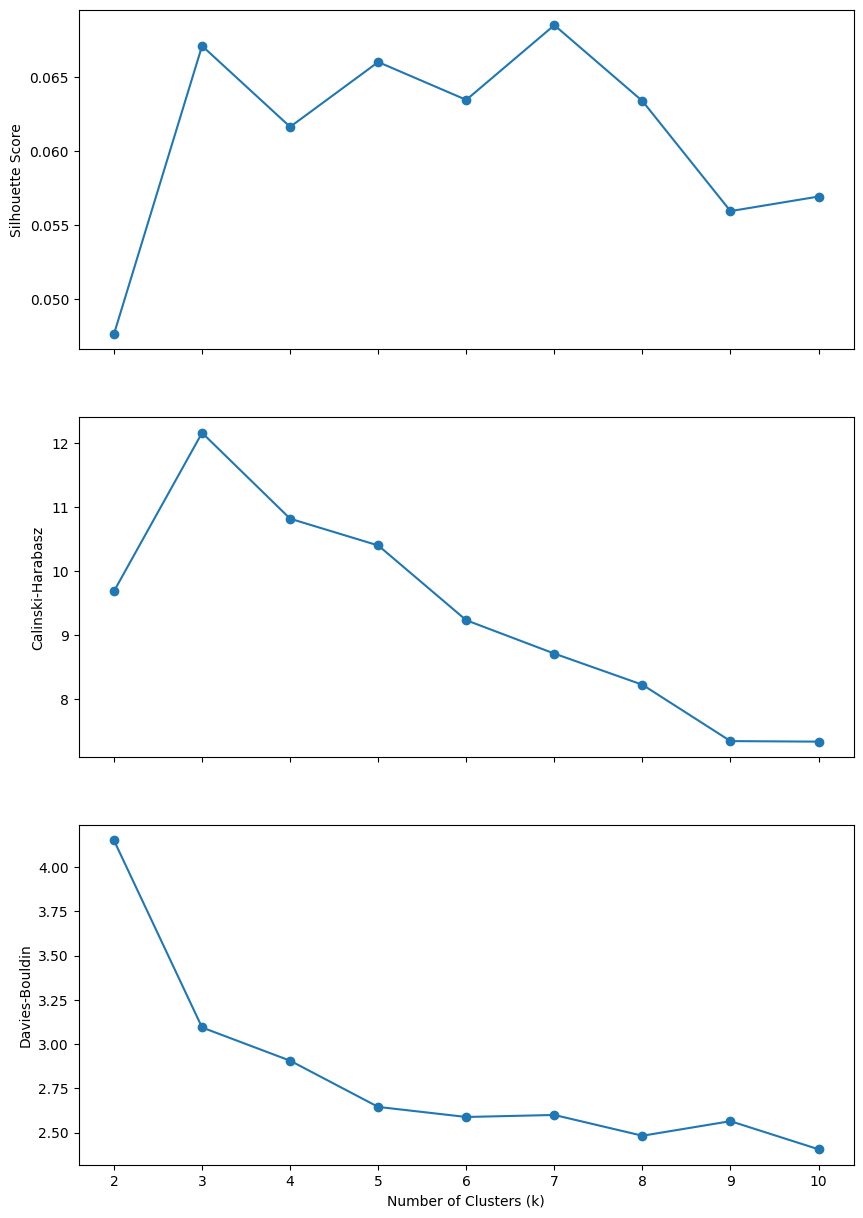

In [10]:
# ========================== A6 ==========================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Step 1: Read dataset (first 500 rows) and remove incomplete entries
data_frame = pd.read_csv("/content/MHDS (2).csv", nrows=500).dropna()

# Step 2: Set target column
target_col = "Stress_Level"

# Step 3: List of categorical features to encode
categorical_cols = [
    'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage', 'Diet_Quality', 'Stress_Level'
]

# Encode categorical variables into numerical form
for column in categorical_cols:
    if column in data_frame.columns:
        data_frame[column] = LabelEncoder().fit_transform(data_frame[column].astype(str))

# Step 4: Select features (exclude ID and target column)
feature_list = [col for col in data_frame.columns if col not in ['User_ID', target_col]]
X_data = data_frame[feature_list].values

# Step 5: Standardize the feature matrix
X_scaled = StandardScaler().fit_transform(X_data)

# Step 6: Use only training features for clustering
X_train_data, _, _, _ = train_test_split(
    X_scaled, data_frame[target_col].values, test_size=0.3, random_state=42
)

# Step 7: Range of cluster values to evaluate
cluster_range = range(2, 11)

# Step 8: Dictionary to store metrics
metrics_dict = {
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Step 9: Evaluate clustering performance for each k
for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_data)
    metrics_dict['Silhouette'].append(silhouette_score(X_train_data, kmeans_model.labels_))
    metrics_dict['Calinski-Harabasz'].append(calinski_harabasz_score(X_train_data, kmeans_model.labels_))
    metrics_dict['Davies-Bouldin'].append(davies_bouldin_score(X_train_data, kmeans_model.labels_))

# Step 10: Plot evaluation metrics
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

axes[0].plot(cluster_range, metrics_dict['Silhouette'], marker='o')
axes[0].set_ylabel('Silhouette Score')

axes[1].plot(cluster_range, metrics_dict['Calinski-Harabasz'], marker='o')
axes[1].set_ylabel('Calinski-Harabasz')

axes[2].plot(cluster_range, metrics_dict['Davies-Bouldin'], marker='o')
axes[2].set_ylabel('Davies-Bouldin')

plt.xlabel('Number of Clusters (k)')
plt.show()


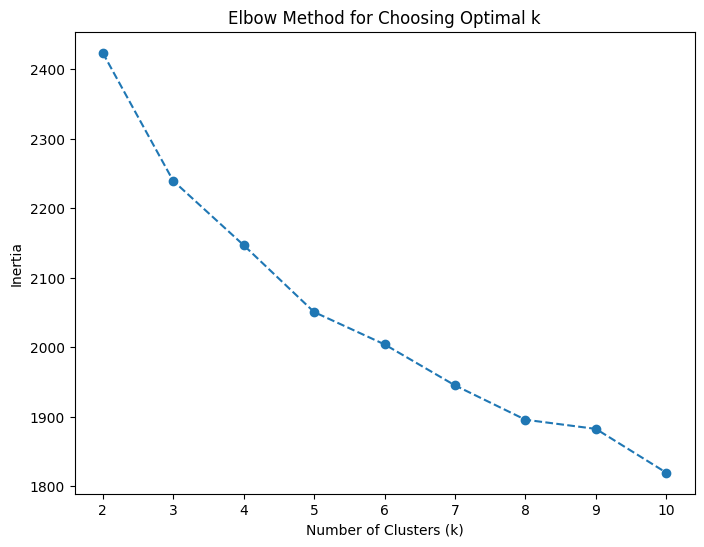

In [11]:
# ========================== A7 ==========================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Step 1: Read the dataset (limit to 500 rows) and remove rows with missing values
data_frame = pd.read_csv("/content/MHDS (2).csv", nrows=500).dropna()

# Step 2: Define the target column
target_col = "Stress_Level"

# Step 3: List categorical columns for encoding
categorical_cols = [
    'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage', 'Diet_Quality', 'Stress_Level'
]

# Step 4: Encode categorical variables into numeric values
for column in categorical_cols:
    if column in data_frame.columns:
        data_frame[column] = LabelEncoder().fit_transform(data_frame[column].astype(str))

# Step 5: Select feature columns excluding ID and target column
feature_cols = [col for col in data_frame.columns if col not in ['User_ID', target_col]]
X_data = data_frame[feature_cols].values

# Step 6: Standardize feature values
X_scaled = StandardScaler().fit_transform(X_data)

# Step 7: Split into training and test sets (only training features used for clustering)
X_train_data, _, _, _ = train_test_split(
    X_scaled, data_frame[target_col].values, test_size=0.3, random_state=42
)

# Step 8: Determine inertia values for k from 2 to 10
cluster_range = range(2, 11)
inertia_values = []

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_data)
    inertia_values.append(kmeans_model.inertia_)

# Step 9: Plot the Elbow Method curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Choosing Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
